In [1]:
%matplotlib inline


# Passing networks

Here we look at how to create a passing network and measure
centralisation. Is one player hogging the ball?

..  youtube:: dwJAZY1oJzA
   :width: 640
   :height: 349


Start with the necessary imports.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen
import pandas as pd

## Choosing the match

In [3]:
parser = Sbopen()
#opening data using competition method
df_competition = parser.competition()
#structure of data
df_competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             71 non-null     int64 
 1   season_id                  71 non-null     int64 
 2   country_name               71 non-null     object
 3   competition_name           71 non-null     object
 4   competition_gender         71 non-null     object
 5   competition_youth          71 non-null     bool  
 6   competition_international  71 non-null     bool  
 7   season_name                71 non-null     object
 8   match_updated              71 non-null     object
 9   match_updated_360          54 non-null     object
 10  match_available_360        8 non-null      object
 11  match_available            71 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 5.8+ KB


In [4]:
df_competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
66,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
67,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
68,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
69,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [5]:
#opening data using match method
df_match = parser.match(competition_id=72, season_id=107)
#structure of data
df_match.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition_id', 'country_name', 'competition_name',
       'season_id', 'season_name', 'home_team_id', 'home_team_name',
       'home_team_gender', 'home_team_group', 'home_team_country_id',
       'home_team_country_name', 'home_team_managers_id',
       'home_team_managers_name', 'home_team_managers_nickname',
       'home_team_managers_dob', 'home_team_managers_country_id',
       'home_team_managers_country_name', 'away_team_id', 'away_team_name',
       'away_team_gender', 'away_team_group', 'away_team_country_id',
       'away_team_country_name', 'away_team_managers_id',
       'away_team_managers_name', 'away_team_managers_nickname',
       'away_team_managers_dob', 'away_team_managers_country_id',
       'away_team_managers_country_name', 'metadata_data_version',
       'metadata_shot_fidelity_version', 'm

In [6]:
df_match

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3904629,2023-08-16,2023-08-16 13:00:00,1,3,available,available,2023-08-30 11:15:11.306289,2023-08-30 11:17:47.551826,6,...,15,Semi-finals,117593,Accor Stadium,14,Australia,1171.0,Tori Penso,241.0,United States of America
1,3906390,2023-08-20,2023-08-20 13:00:00,1,0,available,available,2023-08-22 19:29:29.948278,2023-08-22 19:38:43.965521,7,...,26,Final,117593,Accor Stadium,14,Australia,1171.0,Tori Penso,241.0,United States of America
2,3906389,2023-08-19,2023-08-19 11:00:00,2,0,available,available,2023-08-29 21:16:28.091391,2023-08-29 21:19:57.035390,7,...,25,3rd Place Final,28884,Brisbane Stadium,14,Australia,833.0,Cheryl Foster,249.0,Wales
3,3904628,2023-08-15,2023-08-15 11:00:00,2,1,available,available,2023-08-16 03:41:23.763496,2023-08-16 11:30:31.556462,6,...,15,Semi-finals,28892,Eden Park,163,New Zealand,2426.0,Edina Alves Batista,31.0,Brazil
4,3893806,2023-07-26,2023-07-26 10:30:00,5,0,available,available,2023-08-15 02:56:48.548242,2023-08-15 02:58:57.266594,2,...,10,Group Stage,28892,Eden Park,163,New Zealand,1006261.0,Hyeon-Jeong Oh,121.0,Korea (South)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3893800,2023-07-24,2023-07-24 09:00:00,1,0,available,available,2023-08-12 17:44:57.719395,2023-08-12 17:49:18.347307,1,...,10,Group Stage,28892,Eden Park,163,New Zealand,1626.0,Melissa Paola Borjas Pastrana,101.0,Honduras
60,3893799,2023-07-24,2023-07-24 11:30:00,6,0,available,available,2023-08-21 14:27:48.144704,2023-08-21 14:33:45.142288,1,...,10,Group Stage,28886,AAMI Park,14,Australia,1171.0,Tori Penso,241.0,United States of America
61,3893796,2023-07-23,2023-07-23 08:00:00,2,1,available,available,2023-07-30 08:04:59.799077,2023-07-30 08:06:34.006738,1,...,10,Group Stage,98115,Wellington Regional Stadium,14,Australia,751.0,Katja Koroleva,241.0,United States of America
62,3893795,2023-07-22,2023-07-22 15:00:00,1,0,available,available,2023-08-16 06:04:10.017931,2023-08-16 06:06:04.857484,1,...,10,Group Stage,28891,HBF Park,14,Australia,1627.0,Marie-Soleil Beaudoin,40.0,Canada


In [7]:
df_match_filtered = df_match[(df_match["home_team_country_name"] == "Australia") | (df_match["away_team_country_name"] == "Australia")]
desired_columns = ['match_id', 'home_team_country_name', 'away_team_country_name', 'home_score', 'away_score', 'match_date', 'competition_stage_name']
df_match_filtered_sorted = df_match_filtered[desired_columns].sort_values(by='match_date')
df_match_filtered_sorted.set_index('match_id', inplace=True)
df_match_filtered_sorted

,home_team_country_name,away_team_country_name,home_score,away_score,match_date,competition_stage_name
match_id,,,,,,
3893788,Australia,Ireland,1,0,2023-07-20,Group Stage
3893809,Australia,Nigeria,2,3,2023-07-27,Group Stage
3893821,Canada,Australia,0,4,2023-07-31,Group Stage
3901736,Australia,Denmark,2,0,2023-08-07,Round of 16
3902968,Australia,France,0,0,2023-08-12,Quarter-finals
3904629,Australia,England,1,3,2023-08-16,Semi-finals
3906389,Sweden,Australia,2,0,2023-08-19,3rd Place Final


The match I want to investigate is *3904629*.

## Opening the dataset
The event data is stored in a dataframe *df* as usual.



In [8]:
df, related, freeze, tactics = parser.event(3904629)

## Preparing the data
For passing networks we use only accurate/successful passes made by a team until the first substitution.
This is mainly just to get going and there are several possible variations of this.
We need information about pass start and end location as well as player who made and received the pass. 
To make the vizualisation clearer, we annotate the players using their surname.
(This works for English women side, since players' surnames  are single-barrelled. But
can cause problems.For example, Leo Messi's name in Statsbomb is Lionel Andrés Messi Cuccittini. So the
name Cuccittini will come up if you run this code on his matches!).



In [9]:
#check for index of first sub
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Australia Women's"].iloc[0]["index"]
#make df with successfull passes by Australia until the first substitution
mask_england = (df.type_name == 'Pass') & (df.team_name == "Australia Women's") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in") 
#taking necessary columns
df_pass = df.loc[mask_england, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
#adjusting that only the surname of a player is presented.
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

## Calculating vertices size and location
To calculate vertices size and location, first we create an empty dataframe.
For each player we calculate average location of passes made and receptions.
Then, we calculate number of passes made by each player.
As the last step, we calculate set he marker size to be proportional to number of passes.



In [10]:
scatter_df = pd.DataFrame()
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes 
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

## Calculating edges width
To calculate edge width we again look at the number of passes between players
We need to group the dataframe of passes by the combination of passer and recipient and count passes between them.
As the last step, we set the threshold ignoring players that made fewer than 2 passes.
You can try different thresholds and investigate how the passing network changes when you change it.
It is recommended that you tune this depedning on the message behind your visualisation.



In [11]:
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
df_pass

,x,y,end_x,end_y,player_name,pass_recipient_name,pair_key
35,33.4,23.9,51.1,28.6,Polkinghorne,Fowler,Fowler_Polkinghorne
44,58.4,37.7,67.9,37.0,Hunt,Gorry,Gorry_Hunt
46,68.1,37.0,53.6,36.9,Gorry,Hunt,Gorry_Hunt
48,53.6,36.9,45.7,17.4,Hunt,Polkinghorne,Hunt_Polkinghorne
50,45.3,16.9,52.5,3.0,Polkinghorne,Catley,Catley_Polkinghorne
...,...,...,...,...,...,...,...
2406,47.5,38.7,42.8,49.2,Gorry,Carpenter,Carpenter_Gorry
2409,42.6,48.9,31.1,47.0,Carpenter,Hunt,Carpenter_Hunt
2413,33.0,53.0,41.5,70.5,Hunt,Carpenter,Carpenter_Hunt
2415,41.8,70.1,66.1,68.6,Carpenter,Raso,Carpenter_Raso


In [12]:
#counting passes between players
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

## Plotting vertices
Lets first plot the vertices (players) using the *scatter_df* we created previously
As the next step, we annotate player's surname   .      



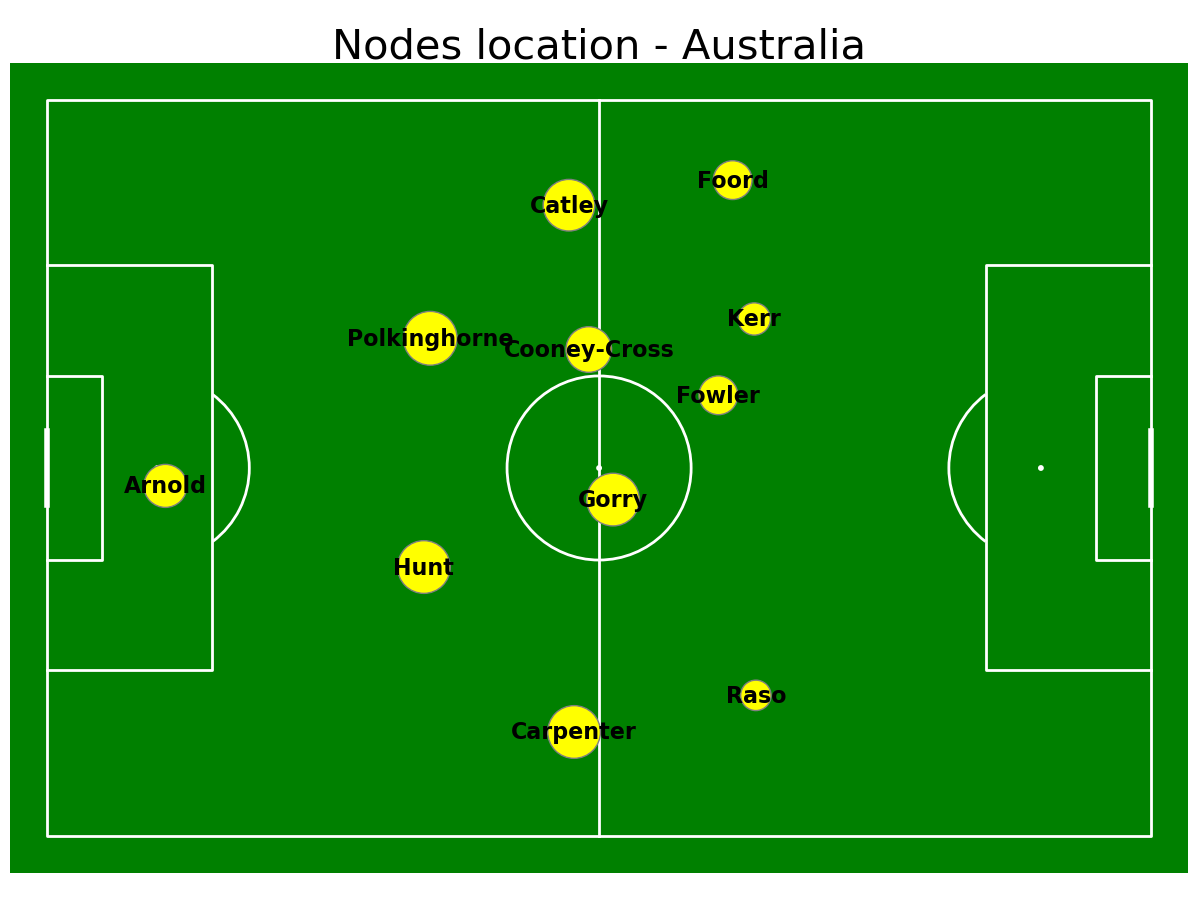

In [13]:
#Drawing pitch
pitch = Pitch(line_color='white', pitch_color='green')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='yellow', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - Australia", fontsize = 30)
plt.show()

## Plotting edges
For each combination of players who made passes, we make a query to *scatter_df* to get the start and end of the line.
Then we adjust the line width so that the more passes between players, the wider the line.
As the next step, we plot the lines on the pitch. It is recommended that zorder of edges is lower than zorder of vertices.
In the end, we make the title.



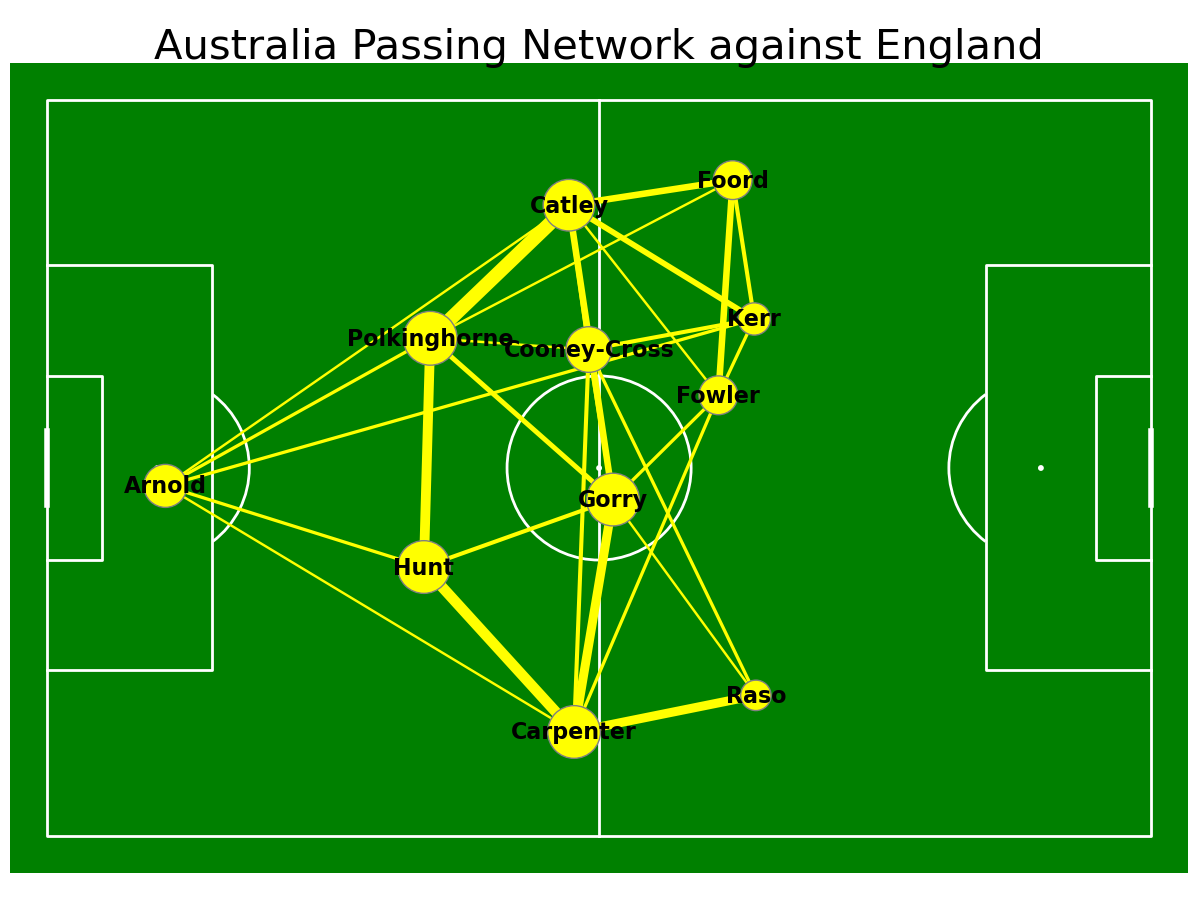

In [14]:
#plot once again pitch and vertices
pitch = Pitch(line_color='white', pitch_color='green')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='yellow', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
    
for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them 
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="yellow", ax = ax["pitch"])

fig.suptitle("Australia Passing Network against England", fontsize = 30)
plt.show()

## Centralisation
To calculate the centralisation index we need to calculate number of passes made by each player. 
Then, we calculate the denominator - the sum of all passes multiplied by (number of players - 1) -> 10
To calculate the numerator we sum the difference between maximal number of successful passes by 1 player
and number of successful passes by each player. We calculate the index dividing the numerator by denominator.



In [15]:
#calculate number of successful passes by player
no_passes = df_pass.groupby(['player_name']).x.count().reset_index()
no_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
print(no_passes)
print("Most passes:", max_no) 
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum() 
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", round(centralisation_index, 3))

     player_name  pass_count
0         Arnold          16
1      Carpenter          24
2         Catley          23
3   Cooney-Cross          18
4          Foord          13
5         Fowler          13
6          Gorry          24
7           Hunt          24
8           Kerr           9
9   Polkinghorne          25
10          Raso           8
Most passes: 25
Centralisation index is  0.04


## Challenge
Make a passing network from England - Sweden game only with passes forward for England!


In [16]:
#check for index of first sub
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Australia Women's"].iloc[0]["index"]
#make df with successfull forward passes by Australia until the first substitution
mask_england = (df.type_name == 'Pass') & (df.team_name == "Australia Women's") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in") & (df.end_x > df.x)
#taking necessary columns
df_pass = df.loc[mask_england, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
#adjusting that only the surname of a player is presented.
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

In [17]:
scatter_df = pd.DataFrame()
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes 
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

In [18]:
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
df_pass

,x,y,end_x,end_y,player_name,pass_recipient_name,pair_key
35,33.4,23.9,51.1,28.6,Polkinghorne,Fowler,Fowler_Polkinghorne
44,58.4,37.7,67.9,37.0,Hunt,Gorry,Gorry_Hunt
50,45.3,16.9,52.5,3.0,Polkinghorne,Catley,Catley_Polkinghorne
83,20.4,64.2,27.8,67.2,Hunt,Carpenter,Carpenter_Hunt
85,28.4,67.7,29.3,60.6,Carpenter,Gorry,Carpenter_Gorry
...,...,...,...,...,...,...,...
2392,74.3,44.7,80.7,17.3,Polkinghorne,Cooney-Cross,Cooney-Cross_Polkinghorne
2395,80.9,16.6,106.8,41.1,Cooney-Cross,Kerr,Cooney-Cross_Kerr
2413,33.0,53.0,41.5,70.5,Hunt,Carpenter,Carpenter_Hunt
2415,41.8,70.1,66.1,68.6,Carpenter,Raso,Carpenter_Raso


In [19]:
#counting passes between players
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

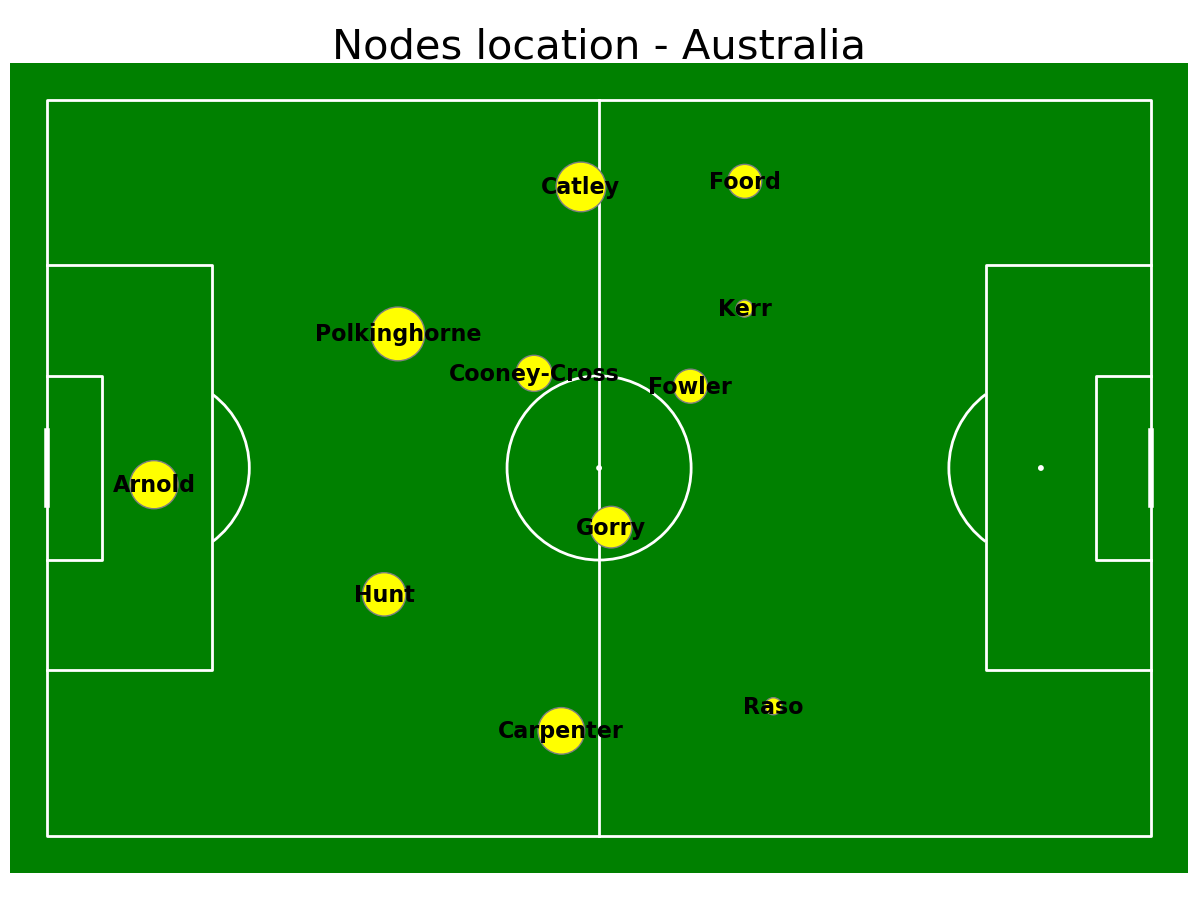

In [20]:
#Drawing pitch
pitch = Pitch(line_color='white', pitch_color='green')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='yellow', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - Australia", fontsize = 30)
plt.show()

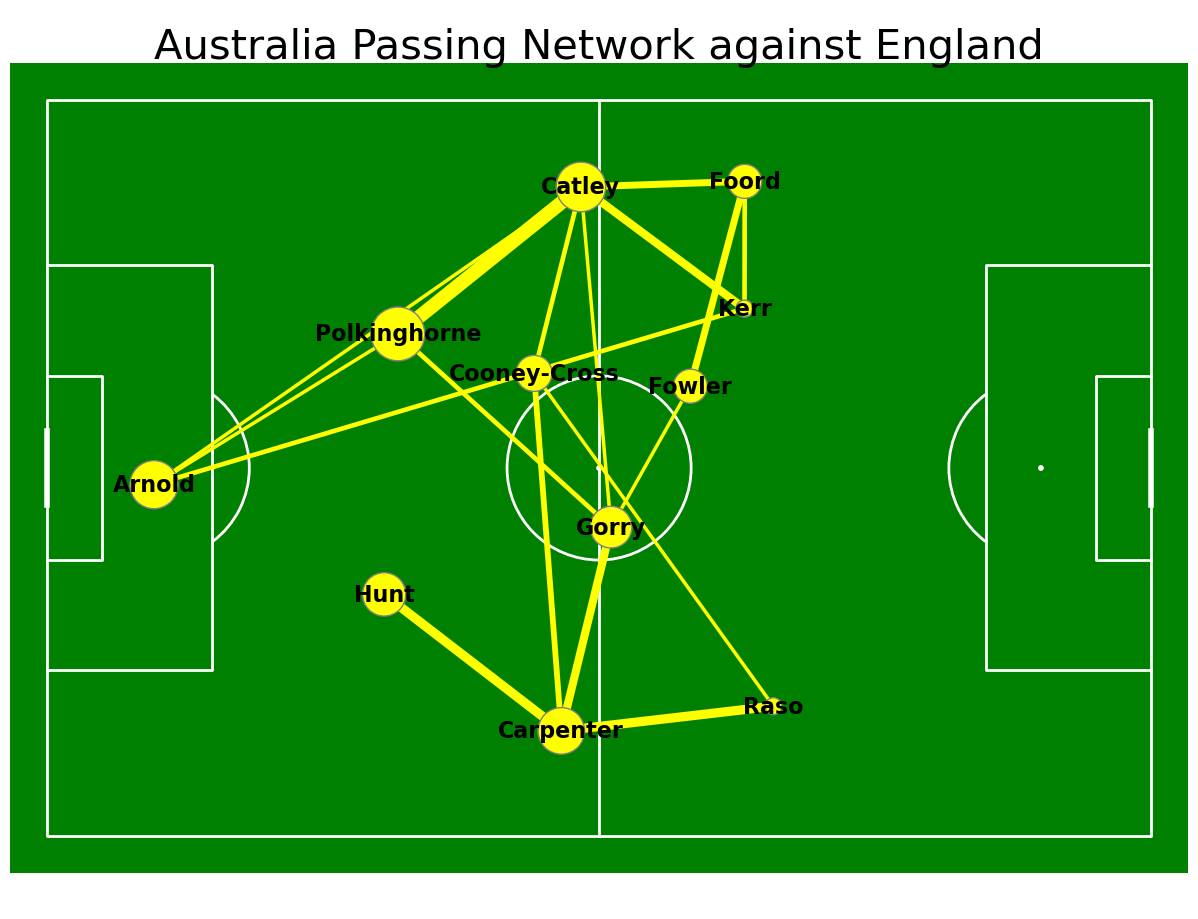

In [21]:
#plot once again pitch and vertices
pitch = Pitch(line_color='white', pitch_color='green')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='yellow', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
    
for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them 
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="yellow", ax = ax["pitch"])

fig.suptitle("Australia Passing Network against England", fontsize = 30)
plt.show()

In [22]:
#calculate number of successful passes by player
no_passes = df_pass.groupby(['player_name']).x.count().reset_index()
no_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
print(no_passes)
print("Most passes:", max_no) 
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum() 
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", round(centralisation_index, 3))

     player_name  pass_count
0         Arnold          16
1      Carpenter          15
2         Catley          17
3   Cooney-Cross           9
4          Foord           8
5         Fowler           8
6          Gorry          12
7           Hunt          13
8           Kerr           2
9   Polkinghorne          20
10          Raso           2
Most passes: 20
Centralisation index is  0.08


### Function Definition 

In [23]:
def plot_pass_network(match_id, team, team_colour, min_passes_threshold=2):
    parser = Sbopen()
    
    # Load the events for the given match_id
    df, related, freeze, tactics = parser.event(match_id)
    
    # Filter passes made by the specified team before the first substitution

    # Check if there are any substitutions for the team
    substitutions = df[(df["type_name"] == "Substitution") & (df["team_name"] == team)]
    if not substitutions.empty:
        # Use the first substitution index as the stopping point for considering passes
        sub_index = substitutions.iloc[0]["index"]
    else:
        # If no substitutions, consider all passes in the match
        sub_index = df.index.max()  # Using the last available index in the DataFrame
        
    #sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == team].iloc[0]["index"]
    mask = (df.type_name == 'Pass') & (df.team_name == team) & (df.index <= sub_index) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
    df_pass = df.loc[mask, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
    df_pass["player_name"] = df_pass["player_name"].apply(lambda x: x.split()[-1])
    df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: x.split()[-1])


    # Calculate vertex positions and sizes including both pass starts and receptions
    scatter_df = pd.DataFrame()
    for i, name in enumerate(df_pass["player_name"].unique()):
        passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
        recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
        passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
        recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
        scatter_df.at[i, "player_name"] = name
        scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
        scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
        scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]
    #adjust the size of a circle so that the player who made more passes 
    scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

    # Create a pitch
    pitch = Pitch(line_color='white', pitch_color='green')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    main_ax = ax['pitch']  # This is the main pitch axis

    # Scatter vertices for players with varying sizes
    for index, player in scatter_df.iterrows():
        main_ax.scatter(player['x'], player['y'], s=player['marker_size'], color= team_colour, edgecolors='grey', linewidth=1, alpha=1, zorder=3)
        main_ax.text(player['x'], player['y'], player['player_name'], color='black', ha='center', weight = "bold", va='center', fontsize=15, zorder=4)

    # Calculate connections between players
    df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
    lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
    lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
    lines_df = lines_df[lines_df['pass_count'] > min_passes_threshold]

    # Plot the pass network with variable edge width and minimum pass threshold
    for index, row in lines_df.iterrows():
        player1, player2 = row['pair_key'].split('_')
        player1_loc = scatter_df[scatter_df['player_name'] == player1]
        player2_loc = scatter_df[scatter_df['player_name'] == player2]
        line_width = row['pass_count'] / lines_df['pass_count'].max() * 10  # Adjust line width based on pass count
        main_ax.plot([player1_loc['x'].values[0], player2_loc['x'].values[0]],
                     [player1_loc['y'].values[0], player2_loc['y'].values[0]],
                     color= team_colour, lw=line_width, zorder=2)
    
    # Calculate centralization score
    #calculate number of successful passes by player
    no_passes = df_pass.groupby(['player_name']).x.count().reset_index()
    no_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
    #find one who made most passes
    max_no = no_passes["pass_count"].max()
    #print(no_passes)
    #print("Most passes:", max_no) 
    #calculate the denominator - 10*the total sum of passes
    denominator = 10*no_passes["pass_count"].sum() 
    #calculate the nominator
    nominator = (max_no - no_passes["pass_count"]).sum()
    #calculate the centralisation index
    centralisation_index = nominator/denominator

    
    plt.show()
    print("Centralisation index is ", round(centralisation_index, 3))


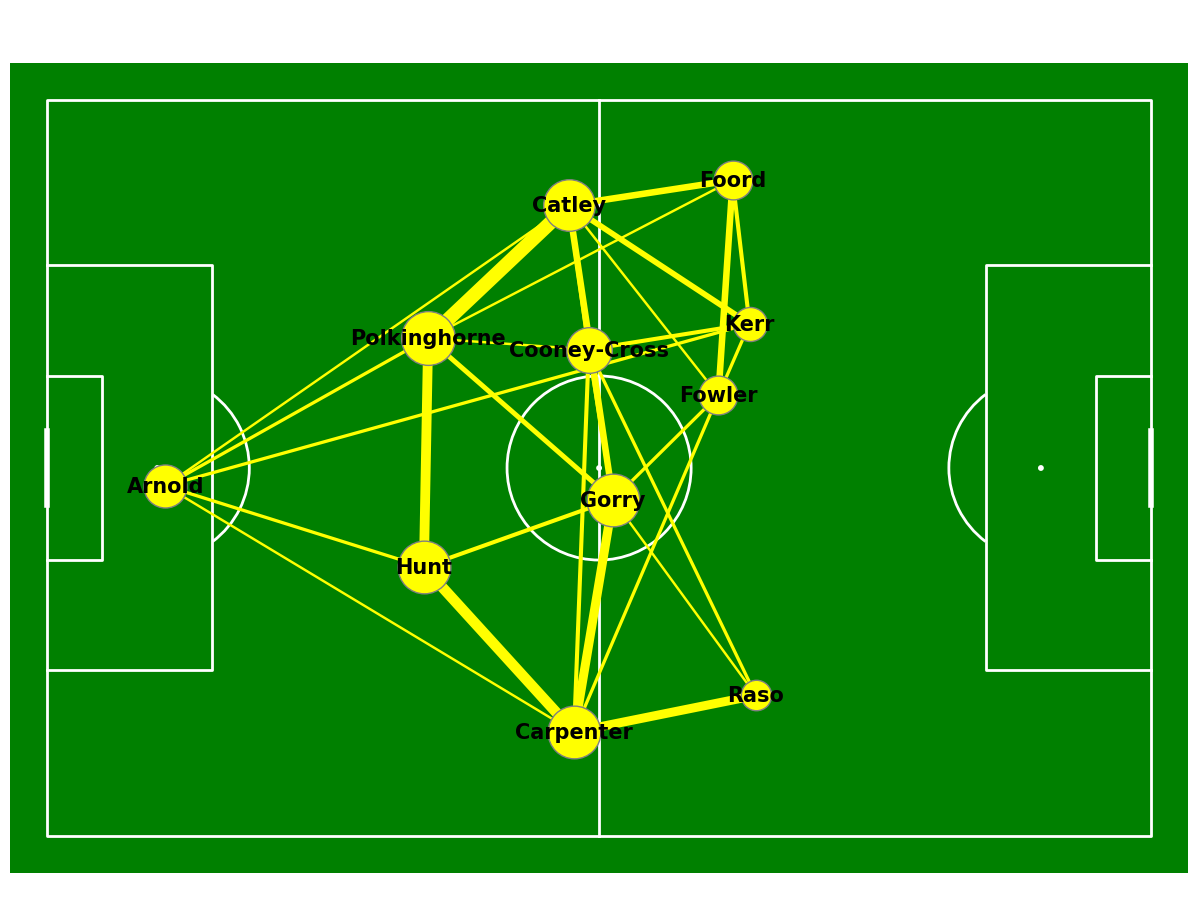

Centralisation index is  0.039


In [24]:
plot_pass_network(3904629, "Australia Women's", "yellow")

In [25]:
df_match_filtered_sorted.index

Int64Index([3893788, 3893809, 3893821, 3901736, 3902968, 3904629, 3906389], dtype='int64', name='match_id')

In [26]:
match_ids = df_match_filtered_sorted.index
team = "Australia Women's" 
team_colour = "yellow"  

In [27]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen

def plot_pass_network_summary(match_id, team, team_colour, match_summary, min_passes_threshold=2):
    parser = Sbopen()
    
    # Load the events for the given match_id
    df, related, freeze, tactics = parser.event(match_id)
    
    # Filter passes made by the specified team before the first substitution
    substitutions = df[(df["type_name"] == "Substitution") & (df["team_name"] == team)]
    sub_index = substitutions.iloc[0]["index"] if not substitutions.empty else df.index.max()
    
    mask = (df.type_name == 'Pass') & (df.team_name == team) & (df.index <= sub_index) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
    df_pass = df.loc[mask, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
    df_pass["player_name"] = df_pass["player_name"].apply(lambda x: x.split()[-1])
    df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: x.split()[-1])

    # Calculate vertex positions and sizes
    scatter_df = pd.DataFrame()
    for i, name in enumerate(df_pass["player_name"].unique()):
        passx, recx = df_pass.loc[df_pass["player_name"] == name, "x"].to_numpy(), df_pass.loc[df_pass["pass_recipient_name"] == name, "end_x"].to_numpy()
        passy, recy = df_pass.loc[df_pass["player_name"] == name, "y"].to_numpy(), df_pass.loc[df_pass["pass_recipient_name"] == name, "end_y"].to_numpy()
        scatter_df.at[i, "player_name"] = name
        scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
        scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
        scatter_df.at[i, "no"] = len(passx) + len(recx)
    
    scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500) if scatter_df['no'].max() > 0 else 0

    # Create a pitch
    pitch = Pitch(line_color='white', pitch_color='green')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    main_ax = ax['pitch']  # This is the main pitch axis
    
    # Scatter vertices for players
    for index, player in scatter_df.iterrows():
        main_ax.scatter(player['x'], player['y'], s=player['marker_size'], color=team_colour, edgecolors='grey', linewidth=1, alpha=1, zorder=3)
        main_ax.text(player['x'], player['y'], player['player_name'], color='black', ha='center', weight='bold', va='center', fontsize=12, zorder=4)

    # Plot the pass network
    df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
    lines_df = df_pass.groupby("pair_key").size().reset_index(name='pass_count')
    lines_df = lines_df[lines_df['pass_count'] > min_passes_threshold]
    for index, row in lines_df.iterrows():
        player1, player2 = row['pair_key'].split('_')
        player1_loc = scatter_df[scatter_df['player_name'] == player1]
        player2_loc = scatter_df[scatter_df['player_name'] == player2]
        line_width = row['pass_count'] / lines_df['pass_count'].max() * 10
        main_ax.plot([player1_loc['x'].values[0], player2_loc['x'].values[0]], [player1_loc['y'].values[0], player2_loc['y'].values[0]], color=team_colour, lw=line_width, zorder=2)
    
    # Calculate centralization score and display
    no_passes = df_pass.groupby(['player_name']).size().reset_index(name='pass_count')
    max_no = no_passes["pass_count"].max()
    denominator = 10 * no_passes["pass_count"].sum()
    nominator = (max_no - no_passes["pass_count"]).sum()
    centralisation_index = nominator / denominator

    # Set titles
    plt.suptitle(match_summary, fontsize=16, fontweight='bold')
    ax['title'].text(0.5, 1.02, f"Centralization index: {centralisation_index:.3f}", transform=ax['title'].transAxes, ha='center', fontsize=10, style='italic')

    plt.show()

# Example of how to call this function:
# plot_pass_network_summary(match_id, "Australia Women's", "yellow", "Australia vs England 1-3 (Semi-finals)")


Plotting for match: 3893788 - Australia vs Ireland 1-0 (Group Stage)


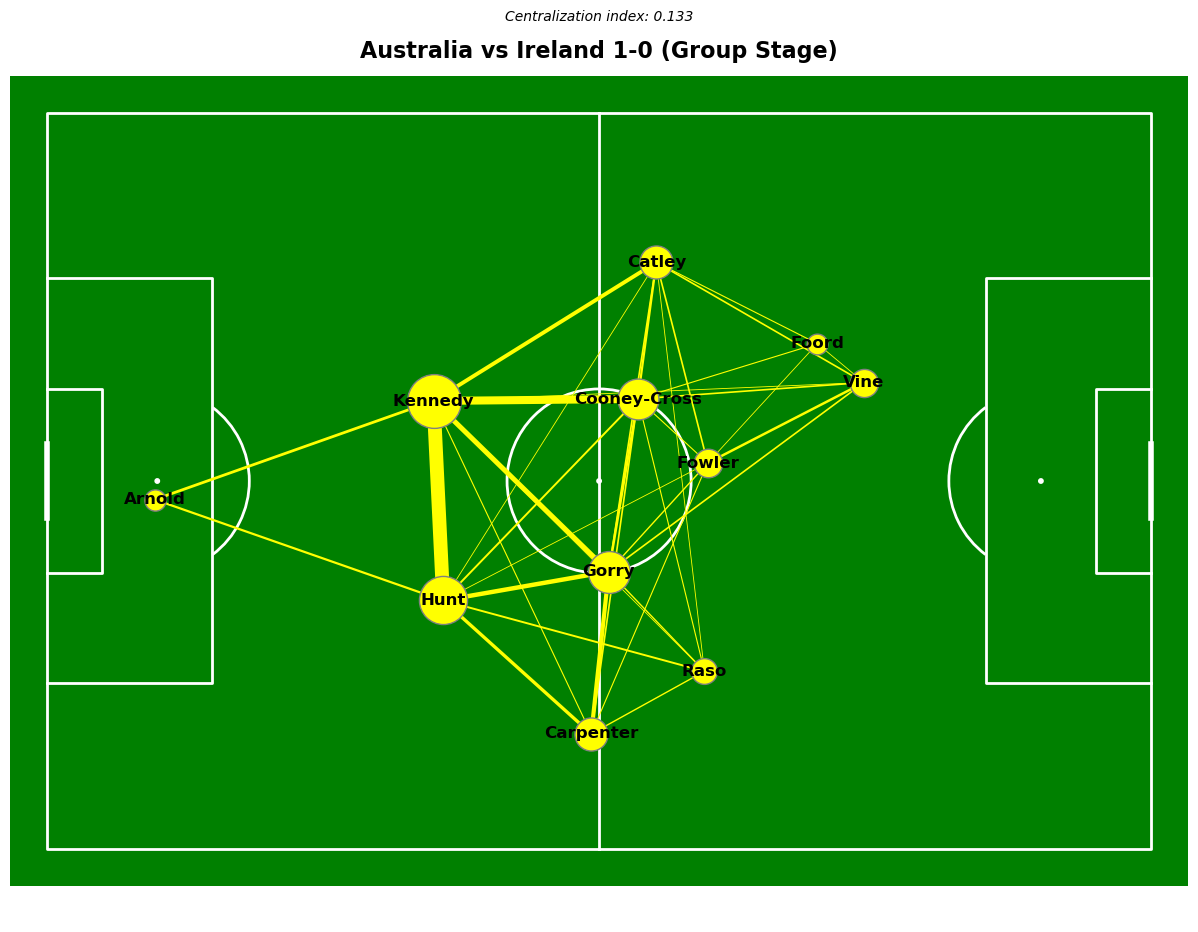

Plotting for match: 3893809 - Australia vs Nigeria 2-3 (Group Stage)


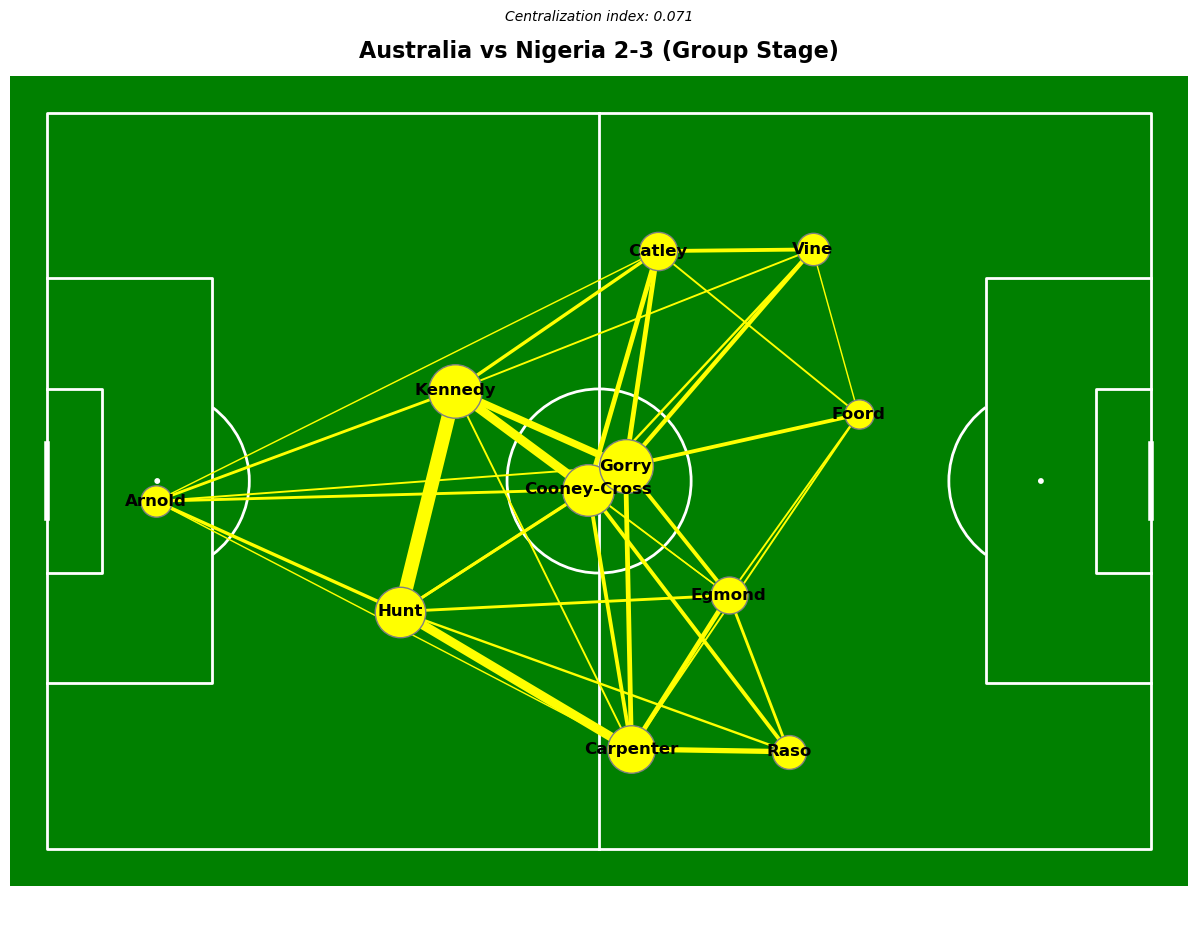

Plotting for match: 3893821 - Canada vs Australia 0-4 (Group Stage)


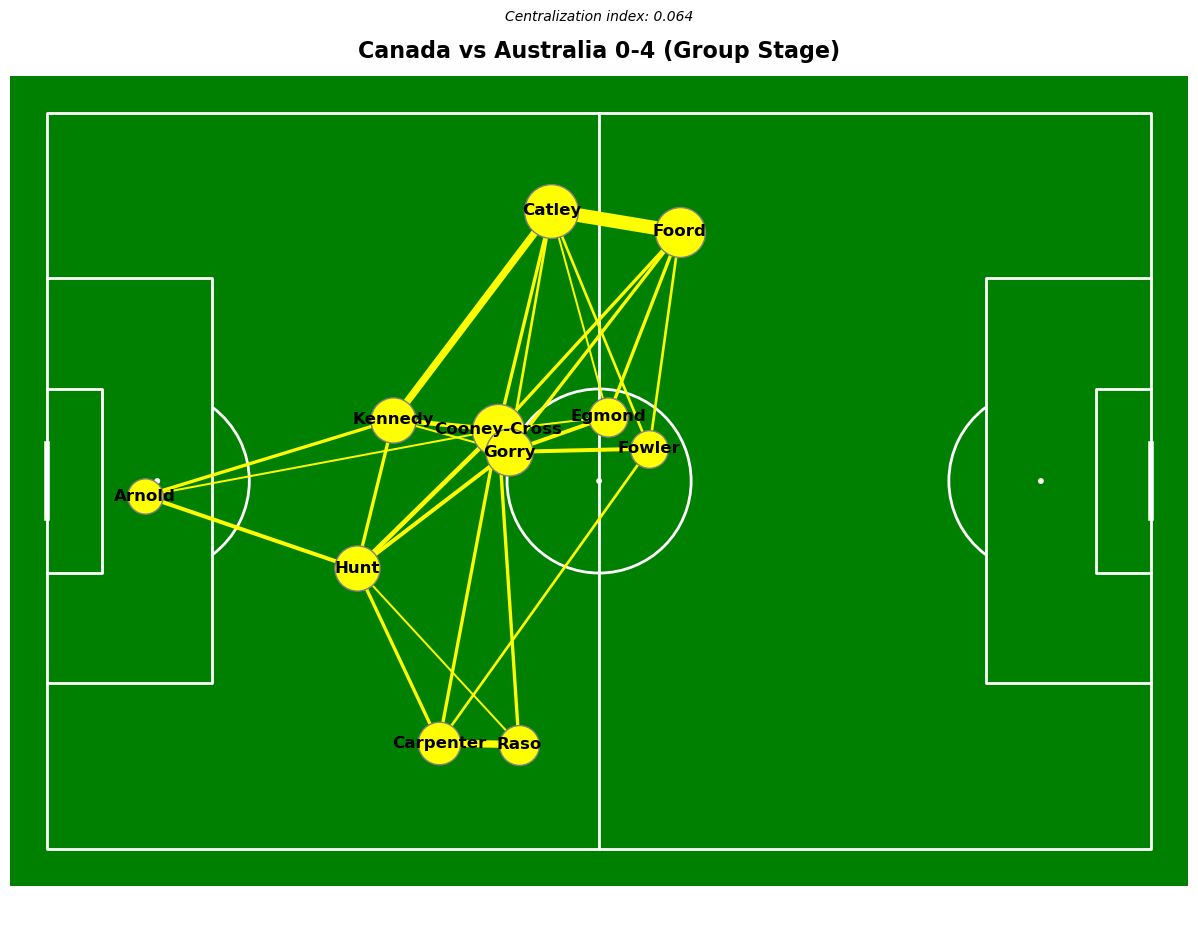

Plotting for match: 3901736 - Australia vs Denmark 2-0 (Round of 16)


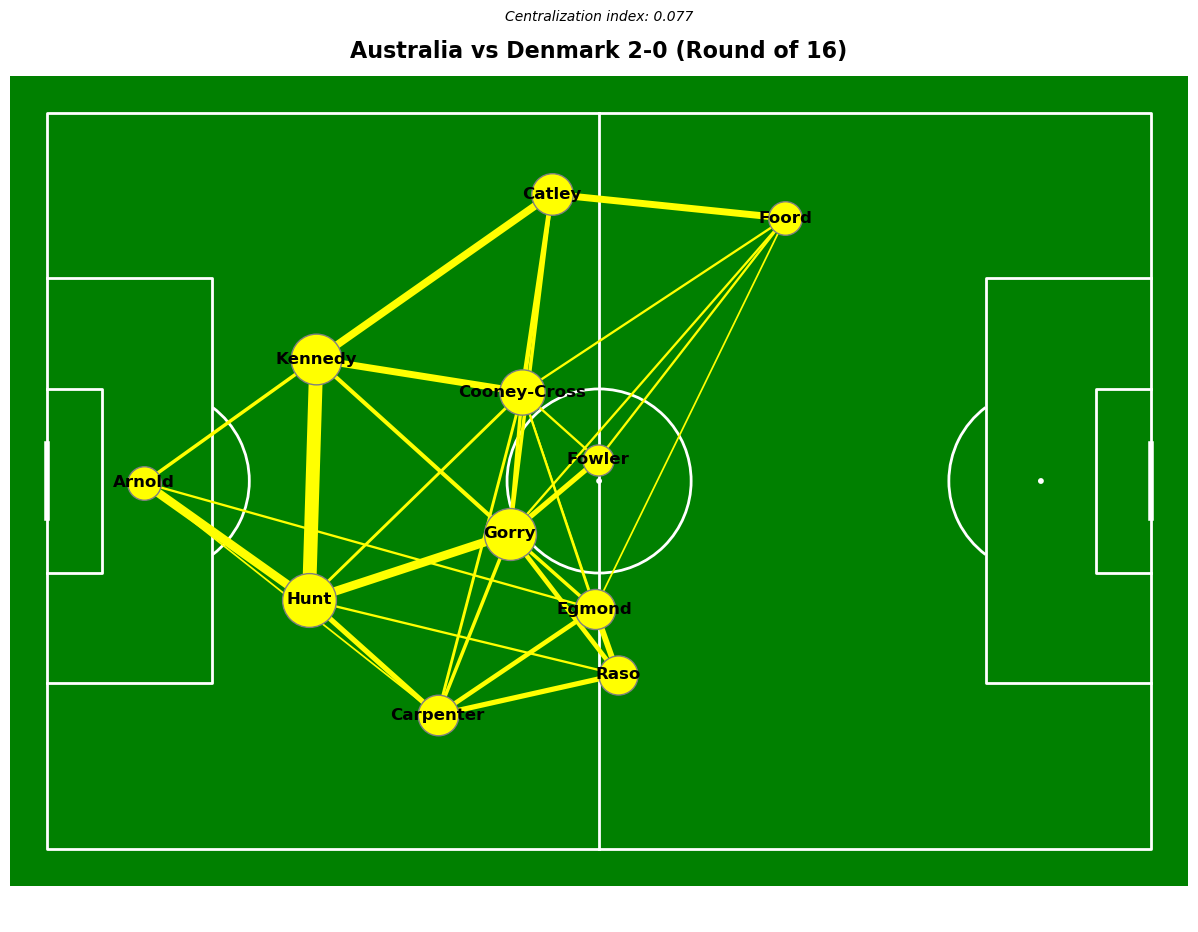

Plotting for match: 3902968 - Australia vs France 0-0 (Quarter-finals)


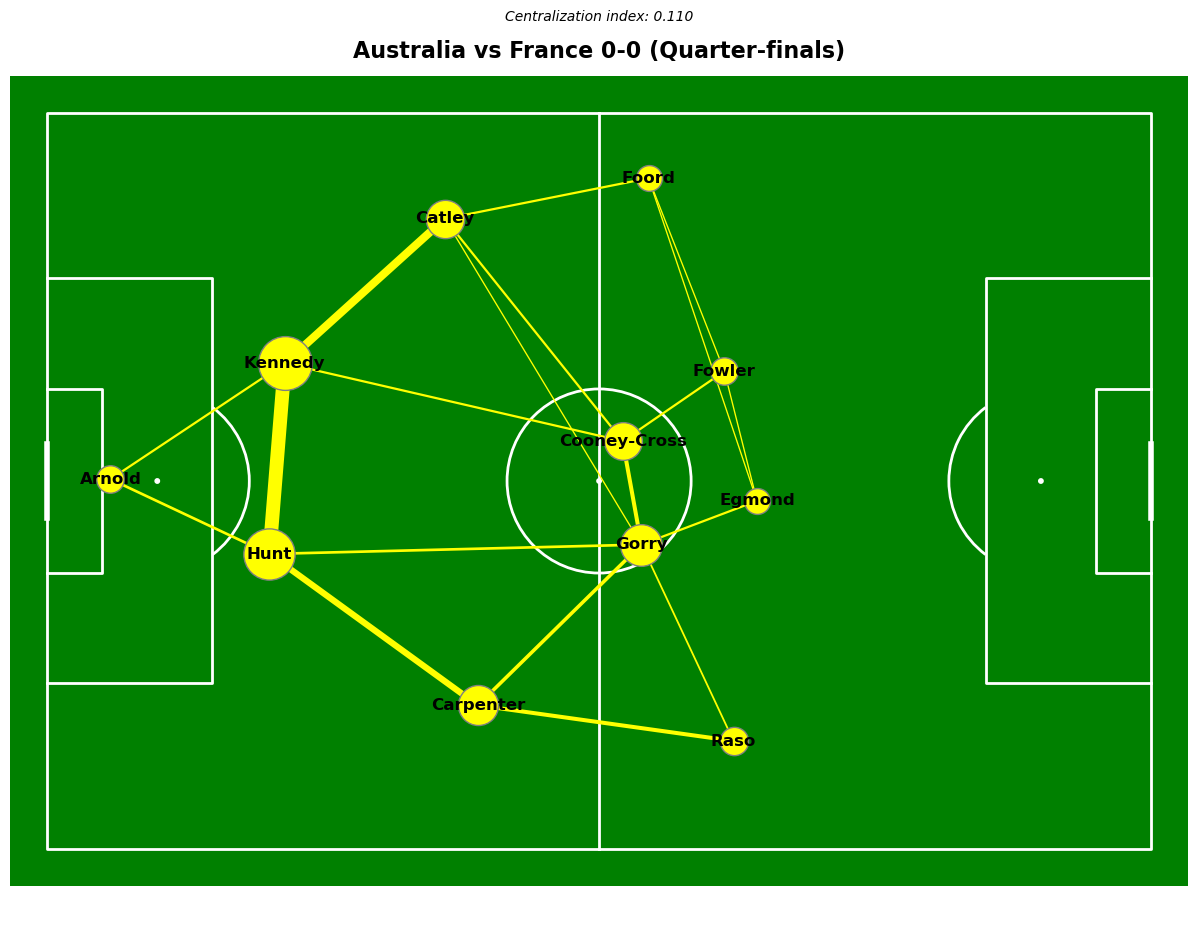

Plotting for match: 3904629 - Australia vs England 1-3 (Semi-finals)


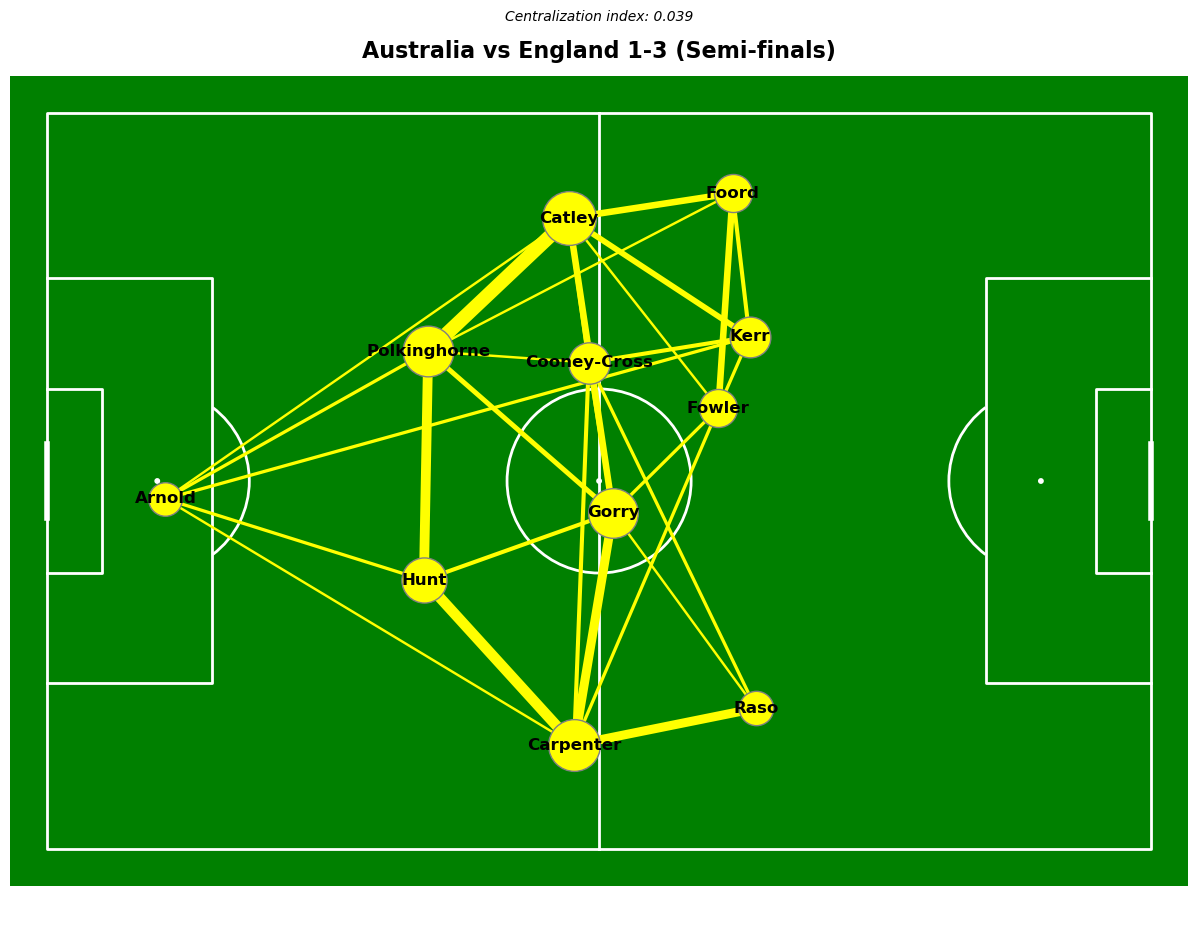

Plotting for match: 3906389 - Sweden vs Australia 2-0 (3rd Place Final)


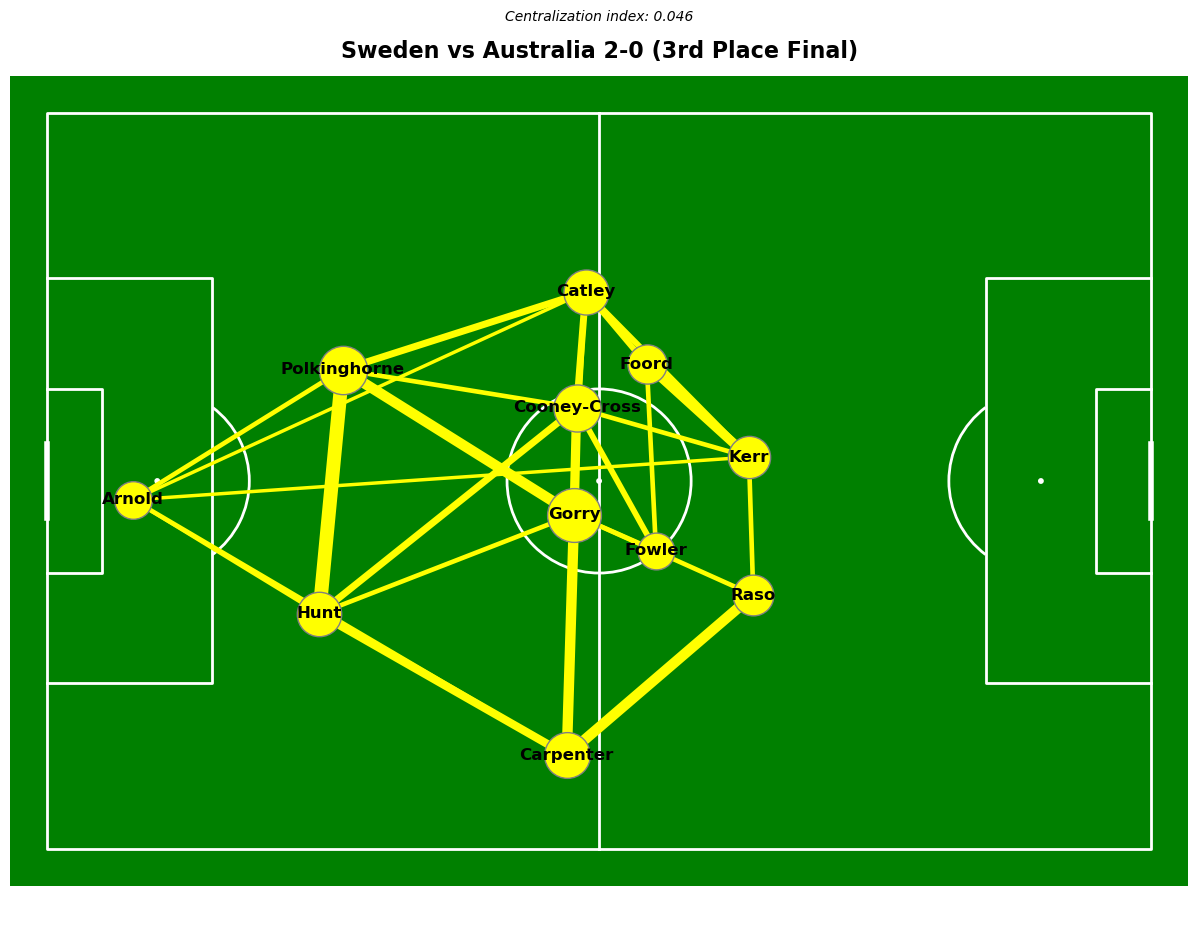

In [28]:
# Assuming the DataFrame and match_ids are set
for match_id in match_ids:
    if match_id in df_match_filtered_sorted.index:
        row = df_match_filtered_sorted.loc[match_id]
        match_summary = f"{row['home_team_country_name']} vs {row['away_team_country_name']} {row['home_score']}-{row['away_score']} ({row['competition_stage_name']})"
        print(f"Plotting for match: {match_id} - {match_summary}")
        plot_pass_network_summary(match_id, team, team_colour, match_summary)
    else:
        print(f"Match ID {match_id} not found in the filtered DataFrame.")


# Spain

In [29]:
df_match_filtered = df_match[(df_match["home_team_country_name"] == "Spain") | (df_match["away_team_country_name"] == "Spain")]
desired_columns = ['match_id', 'home_team_country_name', 'away_team_country_name', 'home_score', 'away_score', 'match_date', 'competition_stage_name']
df_match_filtered_sorted = df_match_filtered[desired_columns].sort_values(by='match_date')
df_match_filtered_sorted.set_index('match_id', inplace=True)
df_match_filtered_sorted

,home_team_country_name,away_team_country_name,home_score,away_score,match_date,competition_stage_name
match_id,,,,,,
3893791,Spain,Costa Rica,3,0,2023-07-21,Group Stage
3893806,Spain,Zambia,5,0,2023-07-26,Group Stage
3893822,Japan,Spain,4,0,2023-07-31,Group Stage
3901733,Switzerland,Spain,1,5,2023-08-05,Round of 16
3902240,Spain,Netherlands,2,1,2023-08-11,Quarter-finals
3904628,Spain,Sweden,2,1,2023-08-15,Semi-finals
3906390,Spain,England,1,0,2023-08-20,Final


In [30]:
match_ids = df_match_filtered_sorted.index
team = "Spain Women's" 
team_colour = "red"  

In [31]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen

def plot_pass_network_summary(match_id, team, team_colour, match_summary, min_passes_threshold=2):
    parser = Sbopen()
    
    # Load the events for the given match_id
    df, related, freeze, tactics = parser.event(match_id)
    
    # Filter passes made by the specified team before the first substitution
    substitutions = df[(df["type_name"] == "Substitution") & (df["team_name"] == team)]
    sub_index = substitutions.iloc[0]["index"] if not substitutions.empty else df.index.max()
    
    mask = (df.type_name == 'Pass') & (df.team_name == team) & (df.index <= sub_index) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
    df_pass = df.loc[mask, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
    df_pass["player_name"] = df_pass["player_name"].apply(lambda x: x.split()[-1])
    df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: x.split()[-1])

    # Calculate vertex positions and sizes
    scatter_df = pd.DataFrame()
    for i, name in enumerate(df_pass["player_name"].unique()):
        passx, recx = df_pass.loc[df_pass["player_name"] == name, "x"].to_numpy(), df_pass.loc[df_pass["pass_recipient_name"] == name, "end_x"].to_numpy()
        passy, recy = df_pass.loc[df_pass["player_name"] == name, "y"].to_numpy(), df_pass.loc[df_pass["pass_recipient_name"] == name, "end_y"].to_numpy()
        scatter_df.at[i, "player_name"] = name
        scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
        scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
        scatter_df.at[i, "no"] = len(passx) + len(recx)
    
    scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500) if scatter_df['no'].max() > 0 else 0

    # Create a pitch
    pitch = Pitch(line_color='white', pitch_color='green')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    main_ax = ax['pitch']  # This is the main pitch axis
    
    # Scatter vertices for players
    for index, player in scatter_df.iterrows():
        main_ax.scatter(player['x'], player['y'], s=player['marker_size'], color=team_colour, edgecolors='grey', linewidth=1, alpha=1, zorder=3)
        main_ax.text(player['x'], player['y'], player['player_name'], color='black', ha='center', weight='bold', va='center', fontsize=12, zorder=4)

    # Plot the pass network
    df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
    lines_df = df_pass.groupby("pair_key").size().reset_index(name='pass_count')
    lines_df = lines_df[lines_df['pass_count'] > min_passes_threshold]
    for index, row in lines_df.iterrows():
        player1, player2 = row['pair_key'].split('_')
        player1_loc = scatter_df[scatter_df['player_name'] == player1]
        player2_loc = scatter_df[scatter_df['player_name'] == player2]
        line_width = row['pass_count'] / lines_df['pass_count'].max() * 10
        main_ax.plot([player1_loc['x'].values[0], player2_loc['x'].values[0]], [player1_loc['y'].values[0], player2_loc['y'].values[0]], color=team_colour, lw=line_width, zorder=2)
    
    # Calculate centralization score and display
    no_passes = df_pass.groupby(['player_name']).size().reset_index(name='pass_count')
    max_no = no_passes["pass_count"].max()
    denominator = 10 * no_passes["pass_count"].sum()
    nominator = (max_no - no_passes["pass_count"]).sum()
    centralisation_index = nominator / denominator

    # Set titles
    plt.suptitle(match_summary, fontsize=16, fontweight='bold')
    ax['title'].text(0.5, 1.02, f"Centralization index: {centralisation_index:.3f}", transform=ax['title'].transAxes, ha='center', fontsize=10, style='italic')

    plt.show()

# Example of how to call this function:
# plot_pass_network_summary(match_id, "Australia Women's", "yellow", "Australia vs England 1-3 (Semi-finals)")


Plotting for match: 3893791 - Spain vs Costa Rica 3-0 (Group Stage)


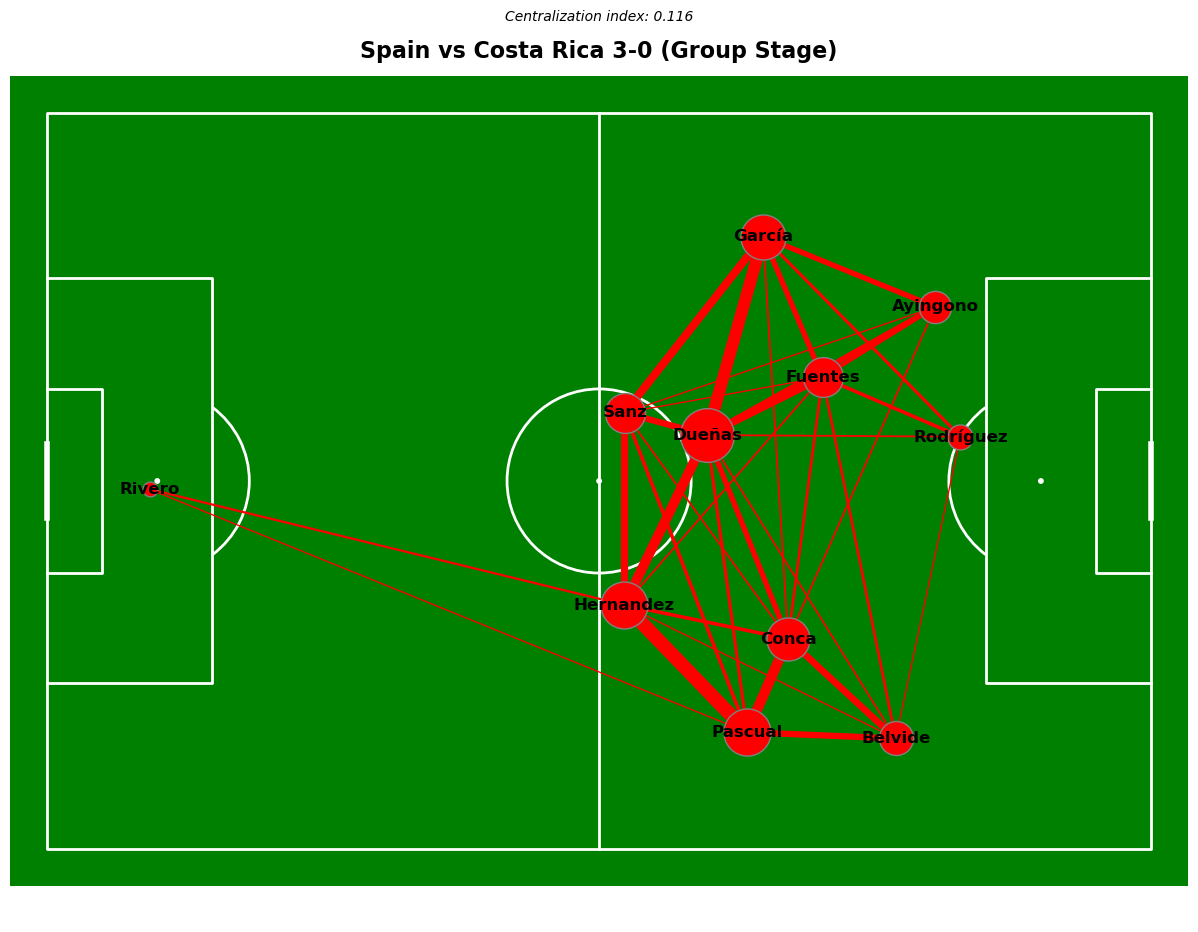

Plotting for match: 3893806 - Spain vs Zambia 5-0 (Group Stage)


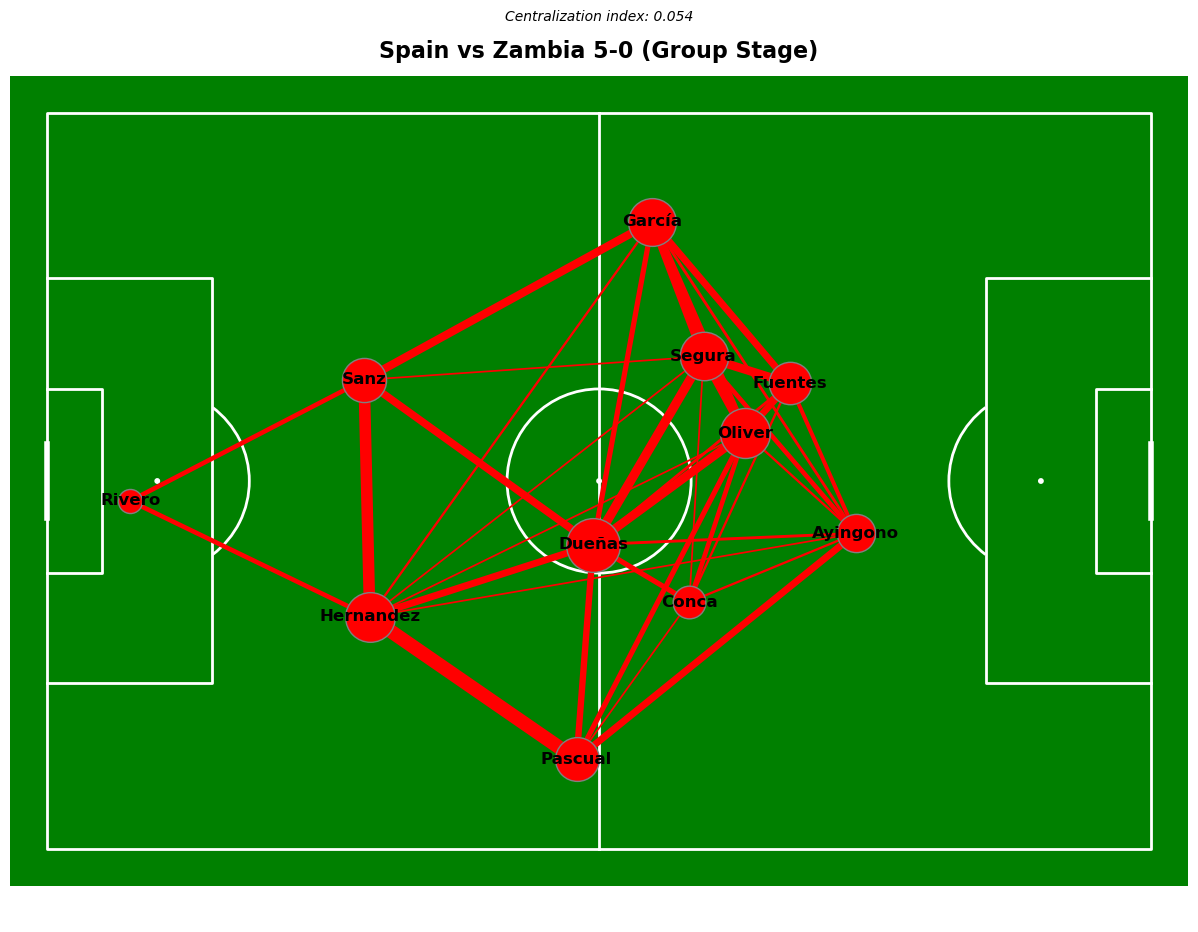

Plotting for match: 3893822 - Japan vs Spain 4-0 (Group Stage)


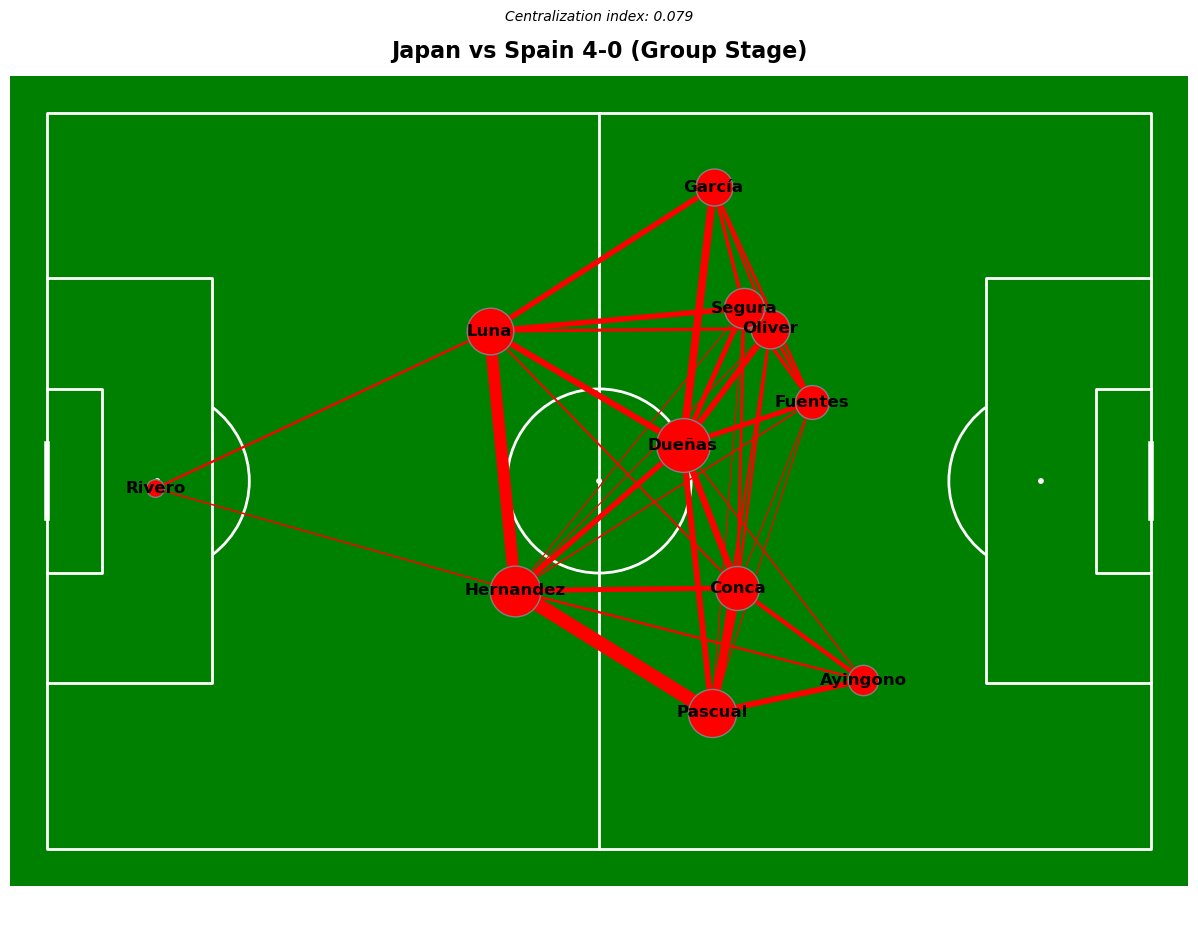

Plotting for match: 3901733 - Switzerland vs Spain 1-5 (Round of 16)


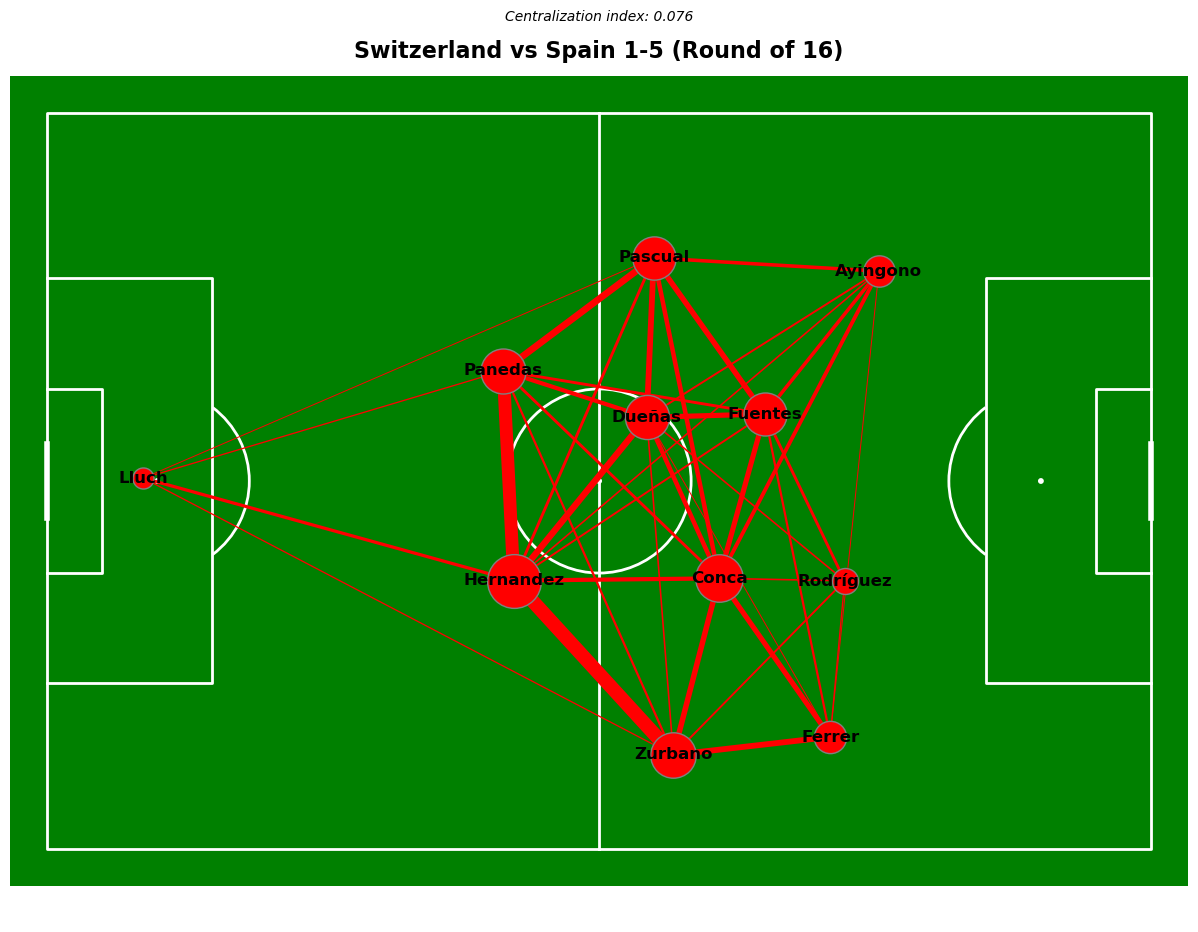

Plotting for match: 3902240 - Spain vs Netherlands 2-1 (Quarter-finals)


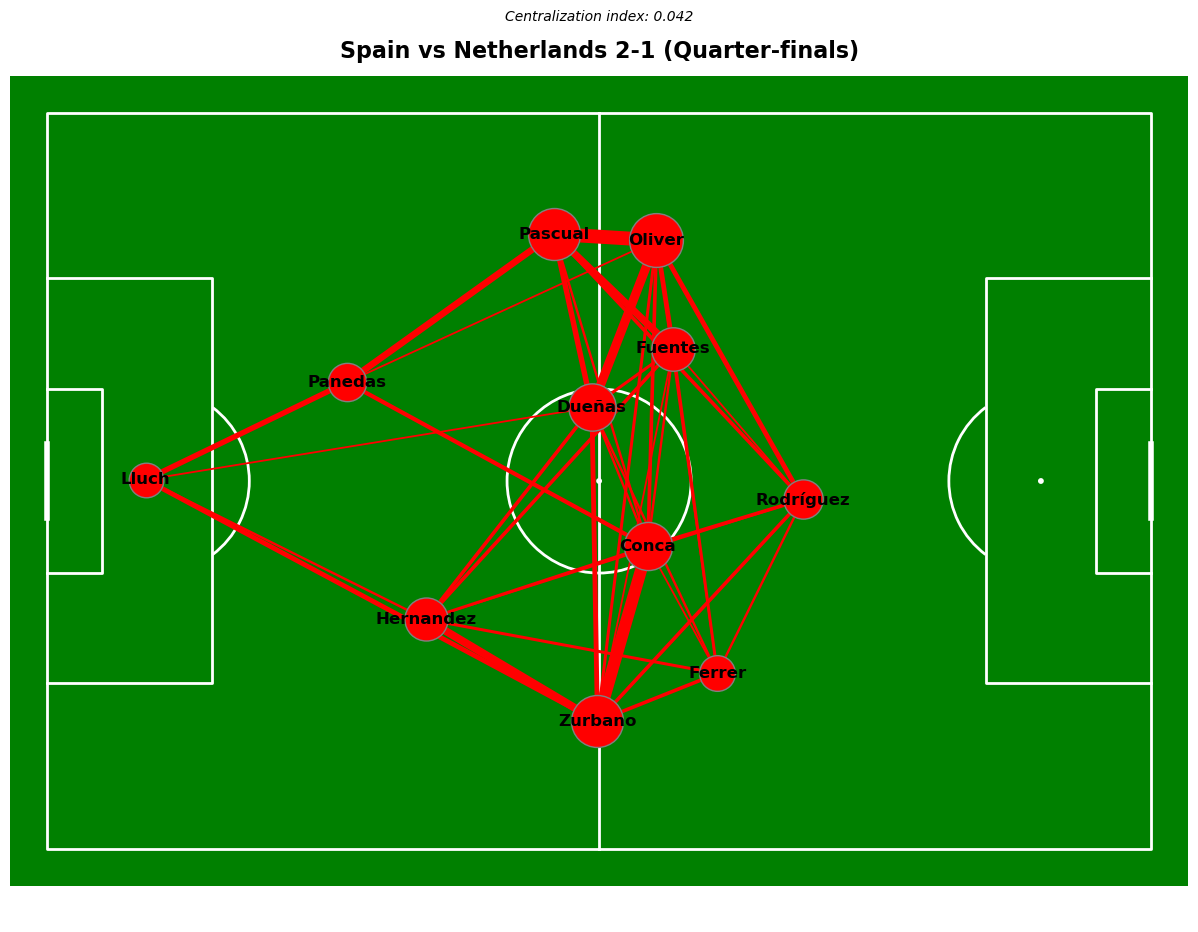

Plotting for match: 3904628 - Spain vs Sweden 2-1 (Semi-finals)


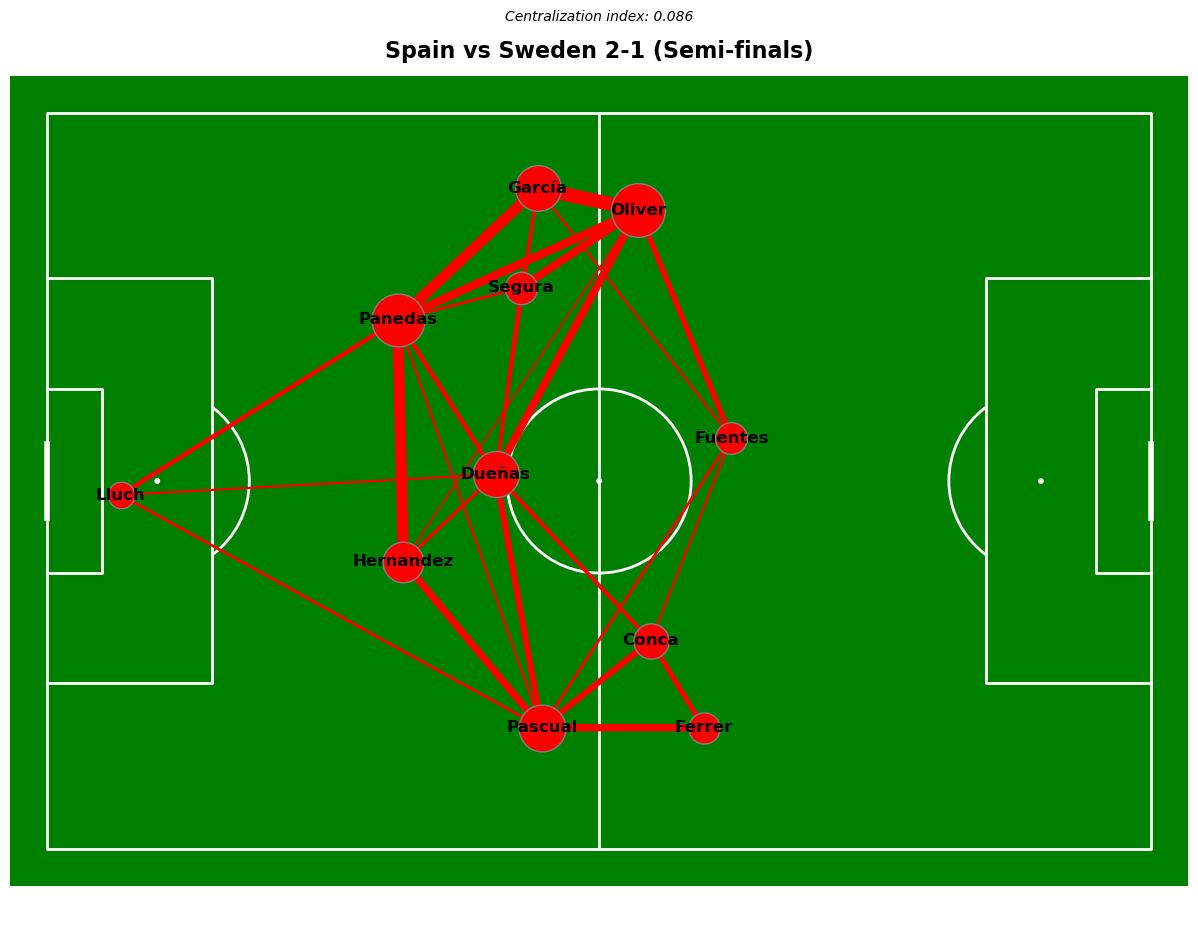

Plotting for match: 3906390 - Spain vs England 1-0 (Final)


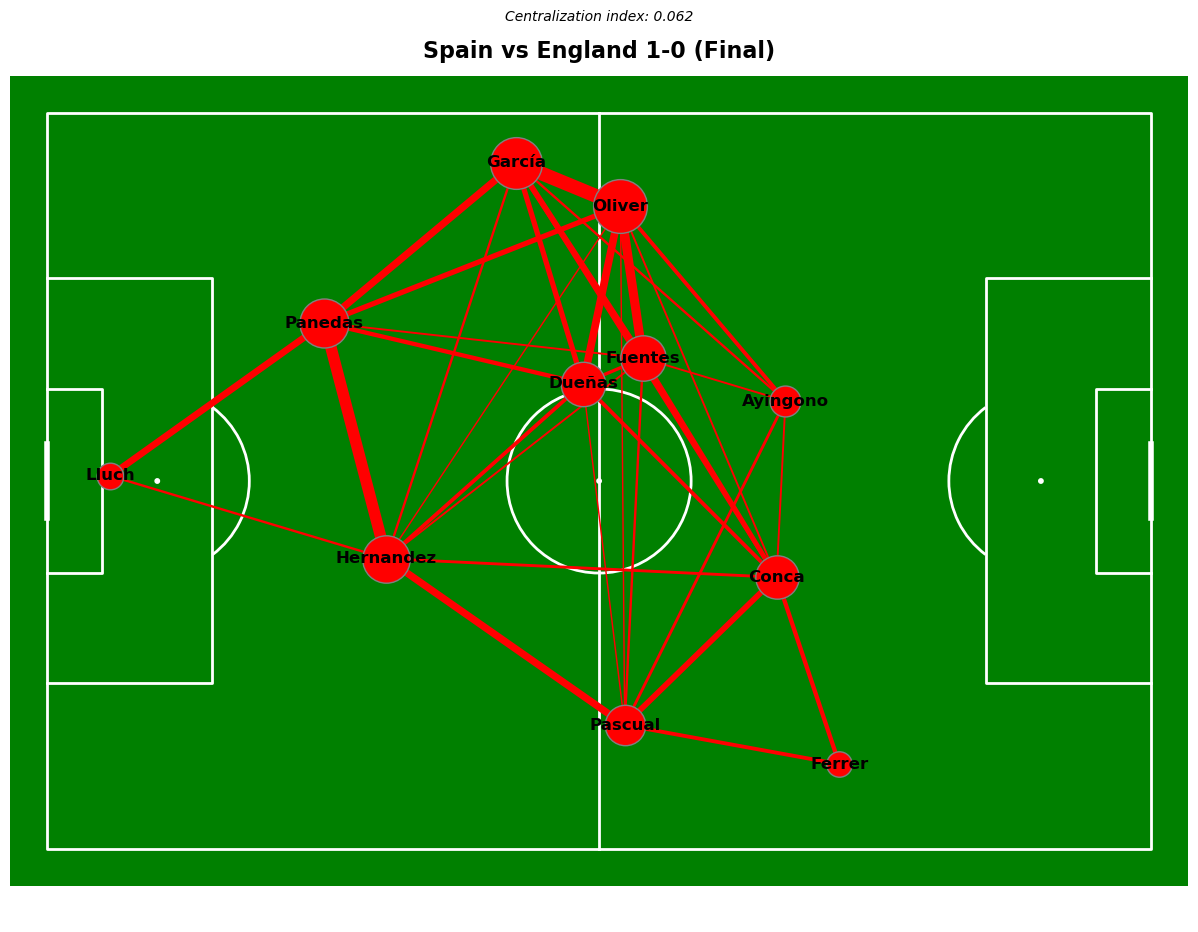

In [32]:
# Assuming the DataFrame and match_ids are set
for match_id in match_ids:
    if match_id in df_match_filtered_sorted.index:
        row = df_match_filtered_sorted.loc[match_id]
        match_summary = f"{row['home_team_country_name']} vs {row['away_team_country_name']} {row['home_score']}-{row['away_score']} ({row['competition_stage_name']})"
        print(f"Plotting for match: {match_id} - {match_summary}")
        plot_pass_network_summary(match_id, team, team_colour, match_summary)
    else:
        print(f"Match ID {match_id} not found in the filtered DataFrame.")


# Centralisation scores comparison

In [99]:
def compute_centralization_index(match_id, team):
    parser = Sbopen()
    
    # Load the events for the given match_id
    df, related, freeze, tactics = parser.event(match_id)
    # Check for any substitutions for the team
    substitutions = df[(df["type_name"] == "Substitution") & (df["team_name"] == team)]
    sub_index = substitutions.iloc[0]["index"] if not substitutions.empty else df.index.max()
    
    # Filter passes made by the specified team before the first substitution
    mask = (df['type_name'] == 'Pass') & (df['team_name'] == team) & (df['index'] <= sub_index) & (df['outcome_name'].isnull()) & (df.sub_type_name != "Throw-in")
    df_pass = df.loc[mask, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
   
    # Calculate centralization score    
    df_pass["player_name"] = df_pass["player_name"].apply(lambda x: x.split()[-1])
    df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: x.split()[-1]) 
    df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)   
    no_passes = df_pass.groupby(['player_name']).size().reset_index(name='pass_count')
    max_no = no_passes["pass_count"].max()
    denominator = 10 * no_passes["pass_count"].sum()
    nominator = (max_no - no_passes["pass_count"]).sum()
    centralisation_index = nominator / denominator
    return(centralisation_index)

In [100]:
df_match_filtered = df_match[(df_match["home_team_country_name"] == "Ireland") | (df_match["away_team_country_name"] == "Ireland")]
desired_columns = ['match_id', 'home_team_country_name', 'away_team_country_name', 'home_score', 'away_score', 'match_date', 'competition_stage_name']
df_match_filtered_sorted = df_match_filtered[desired_columns].sort_values(by='match_date')
df_match_filtered_sorted.set_index('match_id', inplace=True)
df_match_filtered_sorted

,home_team_country_name,away_team_country_name,home_score,away_score,match_date,competition_stage_name
match_id,,,,,,
3893788,Australia,Ireland,1,0,2023-07-20,Group Stage
3893807,Canada,Ireland,2,1,2023-07-26,Group Stage
3893824,Ireland,Nigeria,0,0,2023-07-31,Group Stage


In [101]:
parser = Sbopen()

# Load the events for the given match_id
df, related, freeze, tactics = parser.event(3893788)

In [102]:
df["team_name"][1] 

"Republic of Ireland Women's"

In [104]:
teams = df_match['home_team_country_name'].unique()
teams

array(['Australia', 'Spain', 'Sweden', 'Brazil', 'Netherlands', 'Japan',
       'Nigeria', 'Colombia', 'England', 'United States of America',
       'France', 'Portugal', 'Switzerland', 'Costa Rica', 'Argentina',
       'China', 'Canada', 'Philippines', 'New Zealand', 'Morocco',
       'Korea\xa0(South)', 'Jamaica', 'South Africa', 'Panama', 'Vietnam',
       'Haiti', 'Ireland', 'Norway', 'Germany', 'Italy', 'Denmark',
       'Zambia'], dtype=object)

In [105]:
# Initialize a dictionary to store scores
centralization_scores = {team: [] for team in teams}

for team in teams:
    print(team)
    df_match_filtered = df_match[(df_match["home_team_country_name"] == team) | (df_match["away_team_country_name"] == team)]
    desired_columns = ['match_id', 'home_team_country_name', 'away_team_country_name', 'home_score', 'away_score', 'match_date', 'competition_stage_name']
    df_match_filtered_sorted = df_match_filtered[desired_columns].sort_values(by='match_date')
    df_match_filtered_sorted.set_index('match_id', inplace=True)
    
    # Special case corrections for certain team names
    if team == "China":
        team_name = team + " PR" + " Women's"
    elif team == "Korea\xa0(South)":
        team_name = "Korea Republic Women's"
    elif team == "United States of America":
        team_name = "United States Women's"
    elif team == "Ireland":
        team_name = "Republic of Ireland Women's"
    else: team_name = team + " Women's"
    
    # Calculate centralization score for each match
    for match_id in df_match_filtered_sorted.index:
        score = compute_centralization_index(match_id, team_name)
        centralization_scores[team].append(score)
    
# Calculate the average centralization scores for each team
average_scores = {team: sum(scores)/len(scores) if scores else None for team, scores in centralization_scores.items()}

# Convert to DataFrame for better display and analysis
average_scores_df = pd.DataFrame(list(average_scores.items()), columns=['Team', 'Average Centralization Score'])
print(average_scores_df)


Australia
Spain
Sweden
Brazil
Netherlands
Japan
Nigeria
Colombia
England
United States of America
France
Portugal
Switzerland
Costa Rica
Argentina
China
Canada
Philippines
New Zealand
Morocco
Korea (South)
Jamaica
South Africa
Panama
Vietnam
Haiti
Ireland
Norway
Germany
Italy
Denmark
Zambia
                        Team  Average Centralization Score
0                  Australia                      0.077272
1                      Spain                      0.073893
2                     Sweden                      0.081065
3                     Brazil                      0.088053
4                Netherlands                      0.070501
5                      Japan                      0.070514
6                    Nigeria                      0.070053
7                   Colombia                      0.090322
8                    England                      0.096432
9   United States of America                      0.100507
10                    France                      0.082009


In [111]:
average_scores_df.sort_values("Average Centralization Score")

,Team,Average Centralization Score
22,South Africa,0.059263
31,Zambia,0.066584
6,Nigeria,0.070053
4,Netherlands,0.070501
5,Japan,0.070514
12,Switzerland,0.072716
29,Italy,0.073138
19,Morocco,0.073729
1,Spain,0.073893
26,Ireland,0.075671
